In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
import seaborn as sns

# 12장 파이썬 모델링 라이브러리
* 모델 fitting
* 모델 scoring
* 데이터 cleaning
* 모델링 도구
  * statsmodels
    * https://www.statsmodels.org/stable/index.html
  * scikit-learn(사이킷런)
    * https://scikit-learn.org/stable

## 12.1 판다스와 모델 코드의 인터페이스
* 모델 개발 과정

1. 데이터 로딩: 판다스를 사용하여 데이터를 로드하고 데이터프레임으로 변환

2. 데이터 전처리: 판다스를 사용하여 데이터를 전처리
  * 피처 엔지니어링(feature engineering)
    
3. 모델 훈련: 판다스 데이터프레임을 모델 훈련에 사용

4. 모델 평가: 판다스를 사용하여 모델 성능을 평가

5. 모델 예측: 판다스 데이터프레임을 사용하여 모델 예측


### feature engineering
* 기계 학습 모델의 성능을 향상시키기 위해 데이터의 원시 특징을 변환하는 프로세스
* 데이터를 더욱 정보량이 풍부하고 예측하기 쉽게 만드는 데 도움이 됨
* 피처 엔지니어링 기술
  * 결측값 처리: 결측값은 모델 성능에 부정적인 영향을 줌
    * 결측값을 평균, 중앙값 또는 최빈값으로 대체
    * 결측값을 포함하는 행을 삭제
      
  * 이상치 처리: 이상치는 모델 성능에 부정적인 영향을 줌
    * 이상치를 처리하는 방법
      * 이상치를 제거
      * 이상치를 변환

  * 피처 스케일링: 피처 스케일링은 모든 피처가 동일한 범위에 있도록 보장
    * 모델이 모든 피처에 동일한 가중치를 부여하는 데 도움
    * 피처 스케일링 기술
      * 표준화: 피처의 평균을 0, 표준 편차를 1로 조정
      * 정규화: 피처의 값이 0 과 1 사이에 있도록 조정

  * 피처 변환: 피처 변환은 피처의 분포를 변경
    * 이는 모델이 피처 간의 관계를 더 잘 학습하는 데 도움
    * 피처 변환 기술
      * 로그 변환: 피처의 값을 로그로 변환
      * 제곱근 변환: 피처의 값을 제곱근으로 변환
      
  * 피처 선택: 피처 선택은 모델에 사용할 피처를 선택
    * 이는 모델의 성능을 향상시키고 과적합을 줄이는 데 도움이 됨
      * 상관 관계 분석: 상관 관계가 높은 피처를 제거
      * 통계적 유의성 검정: 통계적으로 유의미하지 않은 피처를 제거
      * 머신 러닝 알고리즘: 피처 중요도를 평가하는 머신 러닝 알고리즘을 사용하여 피처를 선택

  *  피처 생성: 피처 생성은 새로운 피처를 생성
    * 이는 모델이 데이터의 패턴을 더 잘 학습하는 데 도움.
      * 교차 피처: 기존 피처를 결합하여 새로운 피처를 생성
      * 주성분 분석: 기존 피처의 주성분을 추출하여 새로운 피처를 생성
  

## 교차 검증(Cross-Validation)
* 교차 검증은 머신러닝 모델의 성능을 평가하는 방법 중 하나
* 교차 검증은 데이터셋을 여러 개의 폴드(fold)로 나누고, 각 폴드를 한 번씩 평가 데이터로 사용하는 방법
* 예를 들어, 데이터셋을 5개의 폴드로 나누고 교차 검증을 사용하여 모델의 성능을 평가하면 다음과 같다.
  * 데이터셋을 5개의 폴드로 나눈다
  * 첫 번째 폴드를 평가 데이터로 사용하고, 나머지 4개의 폴드를 학습 데이터로 사용하여 모델을 훈련시킨다.
  * 훈련된 모델을 사용하여 평가 데이터에 대한 예측을 만든다.
  * 예측과 실제 값을 비교하여 모델의 성능을 평가함
  * 두 번째 폴드를 평가 데이터로 사용하고, 나머지 4개의 폴드를 학습 데이터로 사용하여 모델을 훈련시킴.
  * 훈련된 모델을 사용하여 평가 데이터에 대한 예측을 만든다. 예측과 실제 값을 비교하여 모델의 성능을 평가한다.
  * 이 과정을 모든 폴드에 대해 반복한다.

* 교차 검증은 다음과 같은 장점이 있다.
  1) 모델의 성능을 정확하게 평가할 수 있다.
  2) 과적합을 방지할 수 있다.
  3) 하이퍼파라미터 튜닝에 사용할 수 있다.

* 교차 검증은 다음과 같은 단점이 있다.
  * 시간이 오래 걸린다.
  * 계산 자원이 많이 필요

* (1) 학습용 데이터 셋 준비 : DataFrame -> Numpy ndArray n차원 배열로 변환
  * df.to_numpy()

In [8]:
# ex
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]})
print(data)
print()
print(data.to_numpy()) # 2차원 (행의 크기, 열의 크기)=(5,3)
print(type(data.to_numpy())) #numpy 객체는 한 가지 데이터타입(모두 숫자형)으로 구성
# ndarray : 차원(5,3 )

   x0    x1    y
0   1  0.01 -1.5
1   2 -0.01  0.0
2   3  0.25  3.6
3   4 -4.10  1.3
4   5  0.00 -2.0

[[ 1.    0.01 -1.5 ]
 [ 2.   -0.01  0.  ]
 [ 3.    0.25  3.6 ]
 [ 4.   -4.1   1.3 ]
 [ 5.    0.   -2.  ]]
<class 'numpy.ndarray'>


(2) 학습용 데이터 셋 준비 : Numpy 2차원 배열 -> DataFrame 


In [9]:
# cf
data_1 = pd.DataFrame([[10,20,30]])
data_1

,0,1,2
0,10,20,30


In [10]:
# ex
arr = data.to_numpy()
df2 = pd.DataFrame(arr, columns=['one', 'two', 'three'])
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


(3) 학습 데이터 셋 준비 : 전체 넘파이 ndarray에서 일부 배열만 선택 - 슬라이싱 이용

In [15]:
# ex
# 1)
df3 = data.copy() # copy() :객체 복사
print(df3.to_numpy()) # 파이썬 객체  ndarray

# 2) 학습용  데이터 (특징): 2차원 배열 추출
df_X = df3.to_numpy()[:, :2] # 특징 추출 x  = (x1, x2)
print(df_X)
print(type(df_X))
print(df_X.shape) # (5,2) :2차원의 배열의 차원

# 3) 학습용 데이터 (타겟) : 타겟 추출
df_y = df3.to_numpy()[:, -1]
print(df_y)
print(type(df_y))
print(df_y.shape) # (5,) : 1차원 벡터의 차원

[[ 1.    0.01 -1.5 ]
 [ 2.   -0.01  0.  ]
 [ 3.    0.25  3.6 ]
 [ 4.   -4.1   1.3 ]
 [ 5.    0.   -2.  ]]
[[ 1.    0.01]
 [ 2.   -0.01]
 [ 3.    0.25]
 [ 4.   -4.1 ]
 [ 5.    0.  ]]
<class 'numpy.ndarray'>
(5, 2)
[-1.5  0.   3.6  1.3 -2. ]
<class 'numpy.ndarray'>
(5,)


# 7.5 범주형 데이터(p.325)

* 모델링을 위한 더미 변수 생성하기
  * 통계나 머신러닝 도구를 사용하다 보면 범주형 데이터를 원-핫 인코딩(one-hot encoding)이라고 부르는 더미 변수(가변수, dummy variable)로 변환
  * 범주를 열로 갖는 DataFrame을 생성하는데, 각 열에는 해당 범주의 발생 여부에 따라 0과 1의 값을 갖는다.

* pd.Categorical() 함수
  *  판다스 시리즈나 데이터프레임에서 범주형 데이터 타입을 생성하는 데 사용
  

In [18]:
# ex
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]})

data['category'] = pd.Categorical(['a', 'b', 'a', 'a', 'b'],
                                  categories=['a', 'b'])
data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   x0        5 non-null      int64   
 1   x1        5 non-null      float64 
 2   y         5 non-null      float64 
 3   category  5 non-null      category
dtypes: category(1), float64(2), int64(1)
memory usage: 381.0 bytes


,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


* pd.get_dummies() 함수
  * 판다스에서 범주형 데이터를 원-핫 인코딩된 피처로 변환하는 데 사용.
  * 원-핫 인코딩은 범주형 데이터를 일련의 이진 피처로 나타내는 기술  
  * 인자
    * prefix: 이 옵션은 원-핫 인코딩된 피처 이름에 사용할 접두사를 지정 

* 원-핫 인코딩은 다음과 같은 다양한 작업에 유용.
  * 머신러닝: 원-핫 인코딩된 피처를 사용하여 머신러닝 모델을 학습할 수 있다.
  * 데이터 분석: 원-핫 인코딩된 피처를 사용하여 범주형 데이터에 대한 통계 분석을 수행할 수 있다.
  * 데이터 시각화: 원-핫 인코딩된 피처를 사용하여 정보성이 풍부하고 시각적으로 매력적인 시각화를 만들 수 있다.
  

In [21]:
# ex: 학습 데이터셋 준비 작업
# 1) one-hot encoding
dummies = pd.get_dummies(data['category'], prefix='dum',
                         dtype=float)
print(dummies)
print()

# 2) 2 개의 데이터프레임을 결합
d1 = data.drop('category', axis=1)
d2 = dummies
data_with_dummies = pd.concat([d1,d2], axis =1)

data_with_dummies # 범주형 데이터 타입은 제거

   dum_a  dum_b
0    1.0    0.0
1    0.0    1.0
2    1.0    0.0
3    1.0    0.0
4    0.0    1.0



,x0,x1,y,dum_a,dum_b
0,1,0.01,-1.5,1.0,0.0
1,2,-0.01,0.0,0.0,1.0
2,3,0.25,3.6,1.0,0.0
3,4,-4.10,1.3,1.0,0.0
4,5,0.00,-2.0,0.0,1.0


## 12.3 statsmodels 소개( Next class 5/23!!!!!!)
* https://www.statsmodels.org
* 다양한 종류의 통계 모델 피팅, 통계 테스트 수행, 데이터 탐색, 시각화를 위한 파이썬 라이브러리
* pip install statsmodels
* import statsmodels.api as sm
* statsmodels 모델
  * 선형 모델, 일반 선형 모델, 로버스트 선형 모델
  * 선형 혼합 효과 모델
  * 분산분석ANOVA 메서드
  * 시계열 처리 및 상태공간 모델
  

In [2]:
# 라이브러리 설치
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### 12.3.1 선형 회귀 모델 예측하기 : OLS
* 선형 회귀 모델 알고리즘 :  최소제곱법(OLS; Ordinary Least Squares)
* API 모듈 임포트해 사용

In [4]:
import statsmodels.api as sm
import numpy as np

* np.c_[a1, a2, ..., aN]
  * 여러 개의 배열을 하나의 배열로 결합해야 하는 경우


In [8]:
#ex
a = np.array([[1, 2]])
print(a.shape) #(1, 2) #2차원 배열의 차원
print(a)

b = np.array([[5, 6]]) #(1,2)
print(b)

c = np.c_[a,b]
print(c) #(1,4)


(1, 2)
[[1 2]]
[[5 6]]
[[1 2 5 6]]


* np.dot(A, B) 함수
  * 두 개의 벡터를 곱하여 내적을 계산할 때
  * 두 개의 행렬을 곱하여 행렬 곱셈을 수행할 때
  * 행렬과 벡터를 곱하여 행렬-벡터 곱셈을 수행할 때

In [10]:
# 두 개의 벡터를 곱하여 내적을 계산
a = np.array([1, 2]) # 1차원 벡터 : (2, )
print(a.shape)

b = np.array([3, 4]) # (2, ) 
c = np.dot(a, b)
print(c)  # 출력: 11

# 두 개의 행렬을 곱하여 행렬 곱셈을 수행
a = np.array([[1, 2], [3, 4]]) # (2, 2)
b = np.array([[5, 6], [7, 8]]) # (2, 2)
c = np.dot(a, b)
print(c)  # 출력: [[19 22]
         # [43 50]]

# # 행렬과 벡터를 곱하여 행렬-벡터 곱셈을 수행
# a = np.array([[1, 2], [3, 4]])
# b = np.array([5, 6])
# c = np.dot(a, b)
# print(c)  # 출력: [17 39]

(2,)
11


### [예제] p.541
* 무작위 데이터로 선형 회귀 모델 생성

(100, 3)


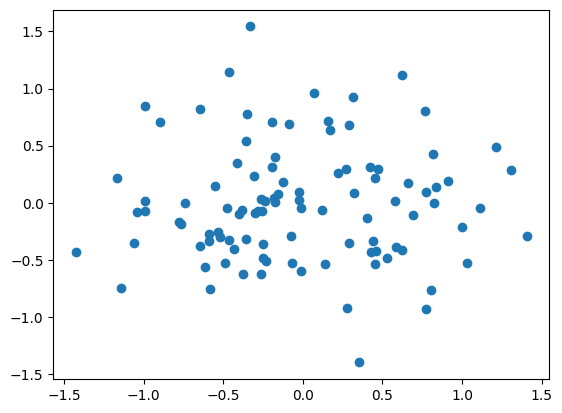

In [17]:
# 1. Numpy data 생성
# 시드를 설정하면 난수 생성기가 항상 같은 순서로 난수를 생성
import matplotlib.pyplot as plt

rng = np.random.RandomState(12345)

def dnorm(mean, variance, size=1): #정규 분포에서 난수를  생성하는 helper 함수
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * rng.standard_normal(*size)

N = 100

dnorm(0, 0.4, size=N).shape
# 3개의 열과 100개의 행으로 구성된 행렬 X
X = np.c_[dnorm(0, 0.4, size=N),
          dnorm(0, 0.6, size=N),
          dnorm(0, 0.2, size=N)]
print(X.shape)
eps = dnorm(0, 0.1, size=N) # 오차항

W = [0.1, 0.3, 0.5] # 가중치, 선형회귀계수, 기울기

# 선형 회귀 모델을 생성.
# X 행렬은 독립 변수이고, y 변수는 종속 변수이며, W 리스트는 회귀 계수
# eps는 오차항
y = np.dot(X,W) + eps

X[:5], y[:5]
X.shape, y.shape

plt.scatter(X[:, 0], y) 

# plt.scatter(X[:1], y)
# plt.scatter(X[:2], y, color = 'orange')

In [18]:
dnorm(0, 0.4, size=N).shape  # (100,)
X.shape # (100, 3)
print(y.shape) #(100,)

(100,)


In [19]:
# case1) import statsmodels.api as sm
# 기존 행렬  X에  Intercept열을 더하기
dfX = sm.add_constant(X)  
dfX[:5]

array([[ 1.        , -0.99020862,  0.87334311,  0.78138662],
       [ 1.        , -0.35578165, -0.44025243, -0.63068125],
       [ 1.        , -0.02065862,  0.23963091, -0.16915475],
       [ 1.        , -0.58755511, -0.44724086, -0.1546557 ],
       [ 1.        , -0.30520574, -0.90522006,  0.1699691 ]])

In [21]:
# 최소제곱법 선형회귀 모형 선택
# 가설 설정 : 모형 선택
model_1 = sm.OLS(y, dfX) # 지도학습

In [22]:
# fit 메서드로 모형 추정. 
results_1 = model_1.fit() #추정 결과는 별도의 RegressionResults 클래스 객체로 반환

In [23]:
results_1.params

array([0.01086424, 0.10505358, 0.38685591, 0.57669577])

In [24]:
results_1.resid

array([ 0.15610676,  0.24620734,  0.09406152,  0.03961322,  0.50396641,
        0.21729349,  0.26251174,  0.1355646 , -0.13415515, -0.16931115,
        0.86147874,  0.21840815, -0.2851302 , -0.45633597, -0.35759324,
       -0.37508588, -0.39906636,  0.10522843, -0.67295228, -0.2684816 ,
       -0.13278143, -0.25616223, -0.02907527,  0.18837705,  0.06584461,
        0.29873385,  0.27699165,  0.30266501, -0.46460245, -0.49159646,
        0.14370821,  0.27239108, -0.03088835, -0.06454656, -0.04034245,
       -0.52871773,  0.05565469,  0.16922079,  0.55964138,  0.60284824,
       -0.01674426,  0.25577988, -0.0038159 ,  0.18087451, -0.42061394,
       -0.45157309,  0.11167234,  0.15033151, -0.66978122,  0.20808476,
       -0.38430867,  0.02952963,  0.09420841, -0.15937503, -0.19794969,
        0.22089908, -0.31150383,  0.49526817, -0.46309367, -0.37167595,
        0.25497087, -0.56803718,  0.1155352 , -0.17175617, -0.15643364,
        0.03917359, -0.03791717,  0.12505924,  0.14817237,  0.14

In [25]:
results_1.summary() #결과 리포트용 summary 메서드

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     56.56
Date:                Thu, 23 May 2024   Prob (F-statistic):           3.82e-21
Time:                        16:09:56   Log-Likelihood:                -22.984
No. Observations:                 100   AIC:                             53.97
Df Residuals:                      96   BIC:                             64.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0109      0.032      0.342      0.733      -0.052       0.074
x1             0.1051      0.052      2.035      0.045       0.003       0.208
x2             0.3869      0.042      9.160      0.000       0.303       0.471
x3             0.5767      0.064      9.002      0.000       0.450       0.704
==============================================================================
Omnibus:                        0.025   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.067
Skew:                          -0.033   Prob(JB):                        0.967
Kurtosis:                       2.891   Cond. No.                         2.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# 선형 회기 모형을 이용하여 미지의 데이터를 이용하여 예측하기 
xnew = [[0,  -0.1295, -1.2128,  0.5042]]
results_1.predict(xnew) # 새로운 xnew 값에 대응하는 y 값을 예측할 수 있다.

array([-0.19201328])